In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math as mt
import os
import pickle
import mlflow
import mlflow.keras
import shap
from tensorflow import keras
import matplotlib.pyplot as plt

In [44]:
with open('data/train/x_train.pkl','rb') as f:
        x1=pickle.load(f)
with open('data/train/y_train.pkl','rb') as f:
        y1=pickle.load( f)
with open('data/valid/x_valid.pkl','rb') as f:
        x2=pickle.load(f)
with open('data/valid/y_valid.pkl','rb') as f:
        y2=pickle.load( f)
with open('data/test/x_test.pkl','rb') as f:
        x3=pickle.load(f)
with open('data/test/y_test.pkl','rb') as f:
        y3=pickle.load( f)

In [45]:
model = tf.keras.models.load_model("model/base_model/gcn1")

Instructions for updating:
Colocations handled automatically by placer.


In [47]:
y1.shape

(31640,)

In [48]:
# Name each one of the classes
class_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC']
# Save an example for each category in a dict
images_dict = dict()
for i, l in enumerate(y1):
  # print(l)
  if len(images_dict)==7:
    break
  if l not in images_dict.keys():
    images_dict[int(l)] = x1[i].reshape((9, 12))

In [49]:
images_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

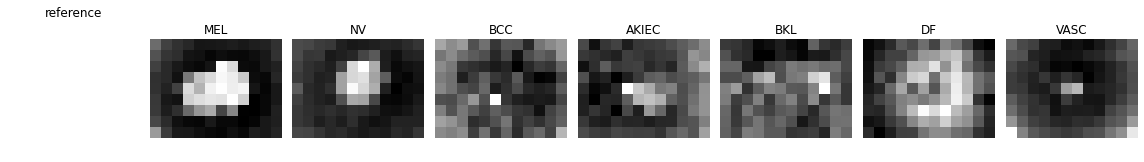

In [50]:
# Function to plot images
def plot_categories(images):
  fig, axes = plt.subplots(1, 8, figsize=(16, 15))
  axes = axes.flatten()
  
  # Plot an empty canvas
  ax = axes[0]
  dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
  ax.set_title("reference")
  ax.set_axis_off()
  ax.imshow(dummy_array, interpolation='nearest')

  # Plot an image for every category
  for k,v in images.items():
    ax = axes[k+1]
    ax.imshow(v, cmap=plt.cm.binary)
    ax.set_title(f"{class_names[k]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()


# Use the function to plot
plot_categories(images_dict)

In [73]:
# Take a random sample of 5000 training images
background = x1[np.random.choice(x1.shape[0], 5000, replace=False)]
# Use DeepExplainer to explain predictions of the model
e = shap.Explainer(model, background)


In [53]:
# Save an example of each class from the test set
x_test_dict = dict()
for i, l in enumerate(y3):
  # print(l)
  if len(x_test_dict)==7:
    break
  if l not in x_test_dict.keys():
    x_test_dict[l] = x3[i]
print(x_test_dict)
# Convert to list preserving order of classes
x_test_each_class = [x_test_dict[i] for i in sorted(x_test_dict)]

# Convert to tensor
x_test_each_class = np.asarray(x_test_each_class)

# Print shape of tensor
print(f"x_test_each_class tensor has shape: {x_test_each_class.shape}")

{2.0: array([[0.6311092 , 0.6144535 , 0.65953636, 0.7183389 , 0.7056031 ,
        0.69090736, 0.7095309 , 0.698755  , 0.6850393 , 0.6762234 ,
        0.6389882 , 0.6419321 ],
       [0.6576156 , 0.65761954, 0.6576234 , 0.71250606, 0.69389045,
        0.71153396, 0.704678  , 0.6919422 , 0.6939061 , 0.6654907 ,
        0.6233556 , 0.6478589 ],
       [0.6655024 , 0.66746634, 0.6978495 , 0.69001365, 0.66453815,
        0.6723819 , 0.63318676, 0.67238975, 0.67729354, 0.6714176 ,
        0.6547619 , 0.6420261 ],
       [0.64105004, 0.6880929 , 0.67633706, 0.5999028 , 0.373532  ,
        0.35883626, 0.43821833, 0.63127774, 0.6636209 , 0.68420434,
        0.6499091 , 0.62541354],
       [0.6646165 , 0.66462046, 0.6626644 , 0.63032913, 0.57937425,
        0.38338274, 0.3079284 , 0.52548724, 0.6568081 , 0.63329256,
        0.64701617, 0.62546057],
       [0.65878373, 0.68034714, 0.6685913 , 0.6930947 , 0.65781945,
        0.5706054 , 0.35991424, 0.5176945 , 0.65979505, 0.66175896,
        0.659

In [74]:
# Compute predictions
predictions = model.predict(x_test_each_class)

In [75]:
# Apply argmax to get predicted class
np.argmax(predictions, axis=1)

array([0, 0, 0, 3, 3, 2, 0], dtype=int64)

In [59]:
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

In [61]:
tf.compat.v1.disable_v2_behavior()

In [56]:
x3.shape

(750, 9, 12)

In [76]:
shap_values = e(x3, max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)

TypeError: 'numpy.ndarray' object is not callable

In [69]:
# Compute shap values using DeepExplainer instance
shap_values = e.shap_values(x_test_each_class)

TypeError: Argument `fetch` = None has invalid type "NoneType". Cannot be None

In [ ]:
# Plot reference column
plot_categories(images_dict)

# Print an empty line to separate the two plots
print()

# Plot shap values
shap.image_plot(shap_values, -x_test_each_class)

In [ ]:
# Save the probability of belonging to each class for the fifth element of the set
coat_probs = predictions[4]

# Order the probabilities in ascending order
coat_args = np.argsort(coat_probs)

# Reverse the list and get the top 3 probabilities
top_coat_args = coat_args[::-1][:3]

# Print (ordered) top 3 classes
for i in list(top_coat_args):
  print(class_names[i])